In [11]:
"""
本节我们将跟随教程实现神经网络，数据集同样还是cifar10
"""
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """
    计算相对误差
    @param x: 一般是数值梯度
    @param y: 一般是解析梯度
    @return: 返回相对误差的值
    """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
"""
创建一个两层网络，以及一个小批量数据集验证网络的正确性
其中使用随机种子保持随机数的不变
"""
# 设置网络结构参数
input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

# 初始化小模型
def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

# 初始化小数据
def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X,y = init_toy_data()

In [13]:
"""
前向传播计算分数score
"""
scores = net.loss(X)

print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# 计算二者误差
print("二者矩阵误差：", end='')
print(np.sum(np.abs(scores-correct_scores)))

[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

二者矩阵误差：3.680272093239262e-08


In [14]:
"""
前向传播计算损失
"""
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

print(loss)
print(correct_loss)
# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))


1.2848224717239367
1.30378789133
Difference between your loss and correct loss:
0.01896541960606335


In [15]:
"""
反向传播
"""
from utils.gradient_check import eval_numerical_gradient

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


iteration 0 / 100: loss 1.241992
最后的损失loss =  0.01714364353292376
[1.2419919059496056, 0.9111895048202696, 0.7279675674105984, 0.5879293122180258, 0.4433967459543883, 0.32122966542541986, 0.22957298913728283, 0.1919533251330564, 0.1426491268037207, 0.12272636325475218, 0.09296065920635964, 0.07794042458724892, 0.0726207244852395, 0.06535573586282979, 0.054615420073885784, 0.04551783081887682, 0.04701316495090248, 0.042977510788276926, 0.03699840899237126, 0.036121535492721395, 0.0360500289489677, 0.03293765061875729, 0.030055459407567958, 0.0315896393778164, 0.028283033075827815, 0.02920994366090314, 0.024269528742684624, 0.026356102364579356, 0.025843432684511513, 0.024542545300299784, 0.02328612585664781, 0.021276854307379228, 0.021998172867316524, 0.021935251899825682, 0.021805446510956828, 0.02138115570555258, 0.02105429793319322, 0.02036505663561043, 0.02120408831582296, 0.01866617297792239, 0.019498065823541286, 0.019135998448977832, 0.019710683237875837, 0.017559288328093243, 0.

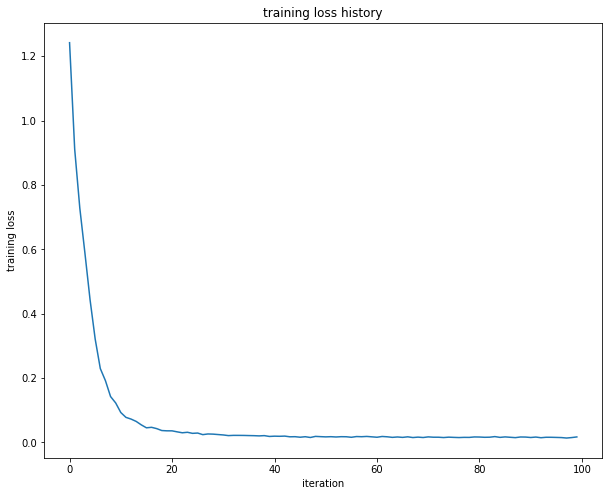

In [16]:
"""
开始训练网络
"""
net = init_toy_model()
stats = net.train(X, y, X, y, learning_rate=1e-1, reg= 5e-6, num_iters=100, verbose=True)
print("最后的损失loss = ", stats['loss_history'][-1])

print(stats['loss_history'])
# 进行绘图
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('training loss history')
plt.show()
# 明显可以看出，损失随轮次降低


In [17]:
"""
使用cifar10进行实验，首先加载数据
"""
from utils.data_utils import get_CIFAR10_data
dict = get_CIFAR10_data()
X_train = dict['X_train']
X_train = X_train.reshape((X_train.shape[0], -1))
y_train = dict['y_train']
X_val = dict['X_val']
X_val = X_val.reshape((X_val.shape[0], -1))
y_val = dict['y_val']
X_test = dict['X_test']
X_test = X_test.reshape((X_test.shape[0], -1))
y_test = dict['y_test']
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)



(49000, 3072)
(49000,)
(1000, 3072)
(1000,)
(1000, 3072)
(1000,)


In [18]:
"""
使用cifar10训练网络
"""
input_size = 32 * 32 *3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# 训练网络
stats = net.train(X_train, y_train, X_val, y_val, num_iters=1000, batch_size=200, learning_rate=1e-4, learning_rate_decay=0.95, reg=0.25, verbose=True)

val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy:', val_acc)


iteration 0 / 1000: loss 2.302751
iteration 100 / 1000: loss 2.300780
iteration 200 / 1000: loss 2.262309
iteration 300 / 1000: loss 2.144663
iteration 400 / 1000: loss 2.087039
iteration 500 / 1000: loss 2.031219
iteration 600 / 1000: loss 2.071667
iteration 700 / 1000: loss 1.935012
iteration 800 / 1000: loss 1.958169
iteration 900 / 1000: loss 1.890947
Validation accuracy: 0.306


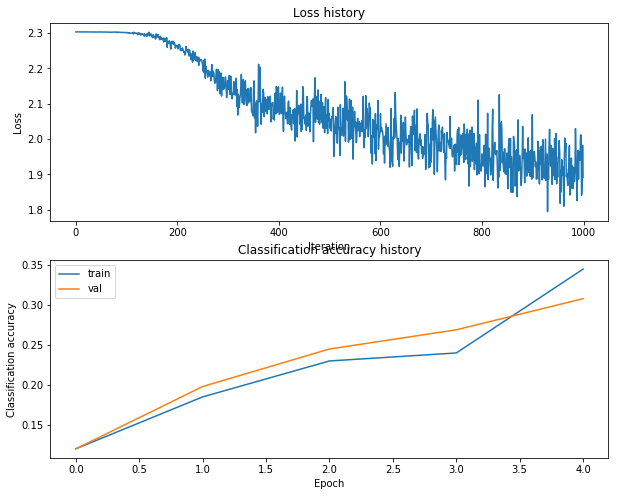

In [19]:
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

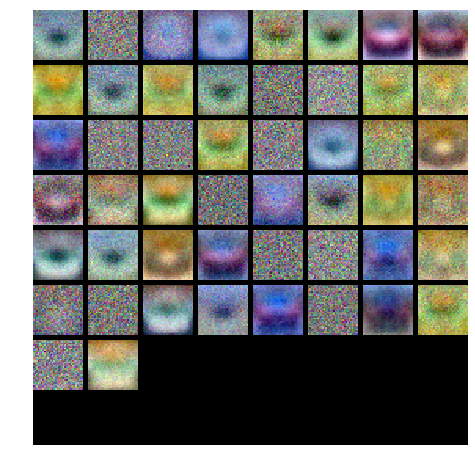

In [20]:
from utils.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

In [ ]:
"""
调整参数，以获得最好的模型
"""
best_net = None

# 使用验证集调整参数，并且保存你最好的模型参数
hidden_size = [75, 100, 125]
results = {}
best_val_acc = 0
best_net = None

learning_rates = np.array([0.7, 0.8, 0.9, 1, 1.1])*1e-3
regularization_strengths = [0.75, 1, 1.25]

print('running')
for hs in hidden_size:
    for lr in learning_rates:
        for reg in regularization_strengths:
            print('.')
            net = TwoLayerNet(input_size, hs, num_classes)
            # 在验证集上训练网络
            stats = net.train(X_train, y_train, X_val, y_val, num_iters=1500, batch_size=200, learning_rate=lr, learning_rate_decay=0.95, reg = reg, verbose=False)
            val_acc = (net.predict(X_val) == y_val).mean()
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_net = net
            results[(hs, lr, reg)] = val_acc

print('\n')
print('finished')
# 输出结果
for hs, lr, reg in sorted(results):
    val_acc = results[(hs, lr, reg)]
    print('hs %d lr %e reg %e val accuracy: %f' % (hs, lr, reg,  val_acc))
print('best validation accuracy achieved during cross-validation: %f' % best_val_acc)

    


running
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [ ]:
# 可视化最好的网络
show_net_weights(best_net)

In [ ]:
# 在最后在测试集上使用
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test acc: %f', test_acc)